# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [9]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 745
nanum_font number: 0


In [10]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [11]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 745
nanum_font number: 0


In [12]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'


## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [13]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 


In [14]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 745
nanum_font number: 0


In [15]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# **지하철 탑승객 분석**
- 파일 읽기
- 데이터 보이기
- 노선별 집계 및 그래프
- 사용일자 별 집계 및 그래프

## 1.주요 라이브러리 읽어들이기

In [1]:
# 데이터 분석을 위해 필요한 프로그램이 정의된 라이브러리 모듈을 읽어들입니다. 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2.파일 읽고 데이터 보이기

In [2]:
# 데이터를 읽어 들여서 출력해 봅니다.
url = 'https://github.com/sagelab4data/first_da_2021_1/blob/main/CARD_SUBWAY_MONTH_202102.csv?raw=true'
subway = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/CARD_SUBWAY_MONTH_202102.csv?raw=true',
                     engine = "python", index_col = False,
                    parse_dates=['사용일자', '등록일자'])
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2021-02-01,중앙선,용문,1282,1259,2021-02-04
1,2021-02-01,중앙선,지평,48,43,2021-02-04
2,2021-02-01,중앙선,아신,415,413,2021-02-04
3,2021-02-01,중앙선,양수,1463,1466,2021-02-04
4,2021-02-01,중앙선,운길산,495,463,2021-02-04
...,...,...,...,...,...,...
16746,2021-02-28,중앙선,오빈,216,236,2021-03-03
16747,2021-02-28,중앙선,양평,3299,3187,2021-03-03
16748,2021-02-28,중앙선,원덕,322,304,2021-03-03
16749,2021-02-28,중앙선,용문,1899,1716,2021-03-03


## 3.노선별 집계 및 그래프

In [7]:
# 노선별 집계하고 그래프를 그려봅니다. 
line_sum = subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['노선명'], aggfunc='sum')
line_sum

,승차총승객수,하차총승객수
노선명,,
1호선,4679191,4542729
2호선,28361914,28569248
3호선,10835360,10815356
4호선,10074811,10158195
5호선,13021347,12950928
6호선,6831414,6732553
7호선,14581263,14366013
8호선,3977672,4010501
9호선,5677271,5772797


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

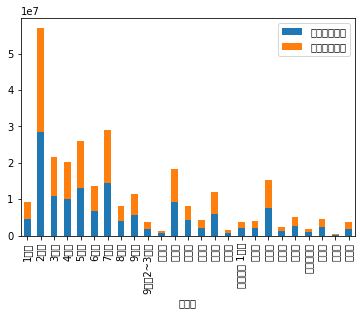

In [16]:
subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['노선명'], aggfunc='sum').plot(kind = 'bar', stacked = True);

## 4.사용일자별 집계 및 그래프

In [17]:
# 사용일자별 탑승자수 집계 및 그래프 
day_sum = subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['사용일자'], aggfunc='sum')
day_sum


,승차총승객수,하차총승객수
사용일자,,
2021-02-01,5985793,5966469
2021-02-02,5964361,5944384
2021-02-03,6226946,6204360
2021-02-04,6194223,6178411
2021-02-05,6304945,6287035
2021-02-06,3978787,3962840
2021-02-07,2766063,2752136
2021-02-08,6158652,6140916
2021-02-09,6232265,6214382


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-pack

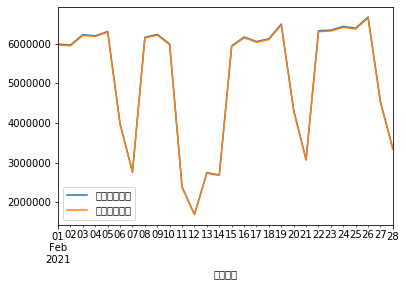

In [18]:
subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['사용일자'], aggfunc='sum').plot(kind = 'line');